# Laboratorio 10




# Modelos de *Clasificación*

* Como su nombre lo indica, los CART sirven también para clasificar.


* Supongamos que tenemos $K \geq 2$ categorías.


* Al igual que en el caso de regresión, cada nodo $m$ representa una región $R_m$ con $n_m$ observaciones.


* Definamos la probabilidad de asignar correctamente a categoría $k$ en el nodo $m$: 

$$
\hat{p}_{mk} = \frac{1}{n_m} \sum_{x_i \in R_m} I(y_{i}=k) 
$$


* En el nodo $m$ clasificamos una observación en la categoría 

$$
k(m) = \arg \max_{k} \hat{p}_{km}
$$

# Métricas de ajuste o pureza


* En regresión utilizamos el $SSR$ para seleccionar la región y el regresor correspondiente.


* En clasificación hay tres candidatos (pero sólo se utilizan los últimos dos):


**Error de Clasificación:**

$$
\frac{1}{n_m} \sum_{x_i \in R_m} I (y_i \neq k(m)) = 1- \hat{p}_{mk(m)}
$$


**Índice de Gini** (no confundir con el coeficiente de Gini!):

$$
\sum_k \hat{p}_{mk}(1-\hat{p}_{mk}) = 1 - \sum_k \hat{p}_{mk}^2
$$


**Entropía cruzada o *deviance*:**

$$
- \sum_k \hat{p}_{mk} \log(\hat{p}_{mk})
$$


* Intuitivamente un nodo es *puro* cuando las observaciones se clasifican en una sola categoría.

# En el caso de 2 categorías

![caption](https://github.com/cgrandet/CIDE_DS/blob/main/Clases/figures/purity.png?raw=1)

[Figura 9.3 de ESL](http://statweb.stanford.edu/~tibs/ElemStatLearn.1stEd/)

# Interpretación


* El *Índice de Gini* es muy bajo cuando todos los $\hat{p}_{mk}$ están cerca a cero o a uno.

> **Por esto se considera que es una medida de la *pureza* del nodo.  
Un valor bajo significa que se clasifican las observaciones predominantemente en una categoría.**

> Se puede interpretar como la varianza en la clasificación: deseamos alta pureza y baja varianza.

* La *entropía cruzada* siempre es positiva:  

$$
\hat{p}_{mk} \in [0,1] \implies \log(\hat{p}_{mk}) <0
$$


> También es muy bajo cuando todos los $\hat{p}_{mk}$ están cerca a cero o uno.

# Cómo se calcula la "impureza" de un nodo


* Tomemos como ejemplo el primer nodo (raíz o inicial).


* En ese nodo no hay restricciones sobre el espacio de regresores, así que tomamos la probabilidad incondicional:


* **Veamos el caso del Gini (la entropía es análogo)**:

$$
\begin{eqnarray*}
Gini_{root} &=& 1 - \hat{Prob}(y=1)^2 - \hat{Prob}(y=0)^2 \\
&=& 1 - \left( \frac{\# \{y_i = 1 \}}{N}\right)^2 - \left( \frac{\# \{y_i = 0\}}{N}\right)^2
\end{eqnarray*}
$$


* Si sólo tenemos observaciones con $y=1$ o $y=2$, tenemos un nodo raíz totalmente puro y el Gini es uno.

# Cómo seleccionamos el primer corte: variable continua



* Supongamos que tenemos una candidata $X_1$ que es una variable continua que toma valores en el rango $[\underline{x}, \bar{x} ]$


* Tomemos un punto de corte candidato $\psi \in [\underline{x}, \bar{x} ]$


* Este punto de corte genera dos regiones 
$$
R_l = X_1 \times \cdots \times X_p |_{X_1 \leq \psi} \\
R_r = X_1 \times \cdots \times X_p |_{X_1 > \psi}
$$

* Así que tenemos dos Ginis, uno para $R_l$ y otro para $R_r$:

$$
G_l = 1 - \hat{Prob}(y=1|R_l)^2 - \hat{Prob}(y=0|R_l)^2 \\
G_r = 1 - \hat{Prob}(y=1|R_r)^2 - \hat{Prob}(y=0|R_r)^2 \\
$$


* El Gini asociado no es más que el *valor esperado* (condicional al nodo padre, que en este caso es la raíz)

$$
E(G) = prob(R_l)G_l + prob(R_r)G_r
$$

donde $prob(R_l)$ es la fracción de observaciones que están en $R_l$, es decir 
$$
\frac{\#\{i: x_{1i} \leq \psi \}}{N}
$$


* El *loop* busca todos los posibles $\phi_k$, y obtiene, para cada variable, el corte que minimiza el índice de Gini.


* Al final seleccionamos la variable que tenga el menor Gini, y su punto de corte correspondiente.

# Qué pasa en los siguientes cortes?



* El proceso continua, pero hay que tener en cuenta que las probabilidades son condicionales a estar en la región actual.


* En cada corte hay dos pasos:

    * **Cálculo del Gini de cada rama**: hay que condicionar por $R_p \cap R_{rama}$, donde $R_p$ es la región del nodo padre.

    * **Cálculo de las probabilides condicionales**: 


así, en la rama izquierda del nodo $p$
$$
prob(R_l|R_p) = \frac{\#\{i: x_{1i} \leq \psi \wedge i \in R_p\}}{N_p}
$$


In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Al aplicar algoritmos de Machine Learning, es fundamental tener siempre presente el problema que estamos tratando de resolver. En la mayoría de los casos, el modelo más preciso y robusto puede ser lo que está buscando. Pero a veces necesitamos obtener información de los datos disponibles y, en estos casos, los modelos transparentes y fáciles de entender, como los árboles de decisión, simplificarán enormemente nuestra tarea.

Los árboles de decisión también pueden ayudar mucho cuando necesitamos comprender los datos.  Dada su transparencia y costo computacional relativamente bajo, los árboles de decisión también son muy útiles para explorar sus datos antes de aplicar otros algoritmos. Son útiles para verificar la calidad de las características diseñadas e identificar las más relevantes al visualizar el árbol resultante.

Las principales desventajas de los árboles de decisión son su tendencia a sobreajustar, su incapacidad para comprender las relaciones entre las características y el uso de algoritmos de aprendizaje *greedy* (no se garantiza que se encuentre el modelo óptimo global). Usarlos en un Random Forest ayuda a mitigar algunos de estos problemas.

Primero entendamos qué hacen

http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

### Paso 1: Índice de Gini
El índice de Gini es el nombre de la función de costos que se usa 
para evaluar las divisiones en el conjunto de datos.

Una división en el conjunto de datos implica un atributo de entrada y un valor para ese atributo. Se puede utilizar para dividir los patrones de entrenamiento en dos grupos de filas.

Una puntuación de Gini da una idea de lo buena que es una división por lo mezcladas que están las clases en los dos grupos creados por la división. Una separación perfecta da como resultado una puntuación de Gini de 0, mientras que la división del peor de los casos que da como resultado 50/50 clases en cada grupo da como resultado una puntuación de Gini de 0,5 (para un problema de 2 clases).

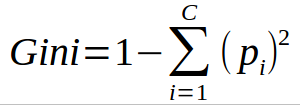



El cálculo de Gini se demuestra mejor con un ejemplo.



### Veamos un ejemplo

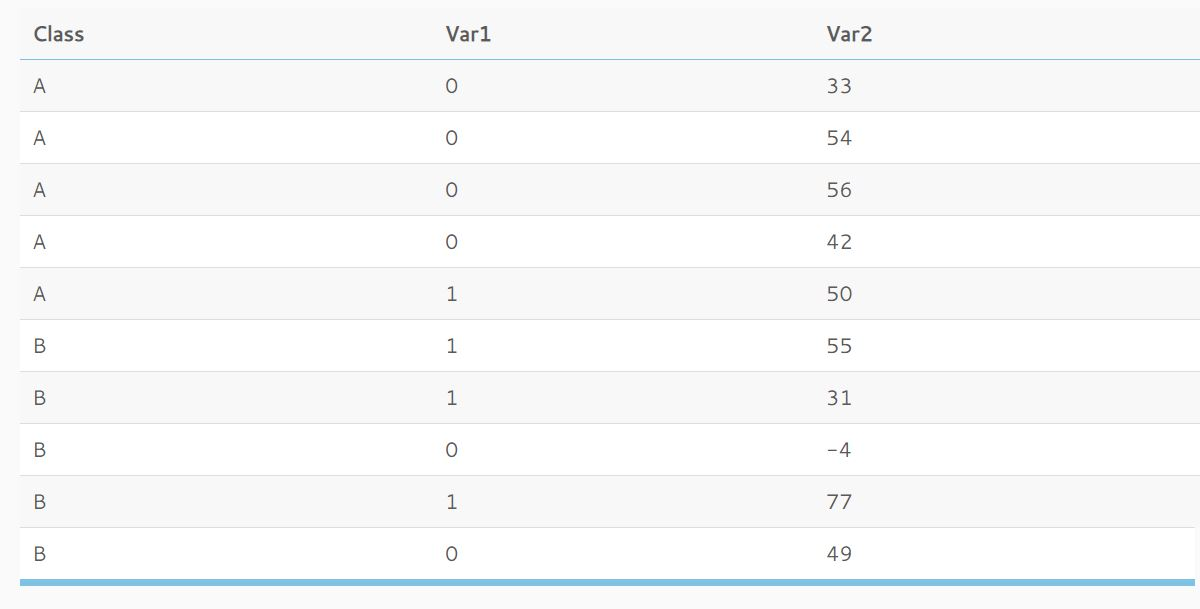

#### Ejemplo de índice de Gini: Var1 == 1
- Línea de base de la división: Var1 tiene 4 instancias (4/10) donde es igual a 1 y 6 instancias (6/10) cuando es igual a 0.
- Para Var1 == 1 & Class == A: 1/4 instancias tienen clase igual a A.
- Para Var1 == 1 & Class == B: 3/4 instancias tienen clase igual a B.
- El índice de Gini aquí es 1 - ((1/4) ^ 2 + (3/4) ^ 2) = 0.375
- Para Var1 == 0 & Class == A: 4/6 instancias tienen clase igual a A.
- Para Var1 == 0 & Class == B: 2/6 instancias tienen clase igual a B.
- El índice de Gini aquí es 1 - ((4/6) ^ 2 + (2/6) ^ 2) = 0.4444
- Luego ponderamos y sumamos cada una de las divisiones en función de la línea de base / proporción de los datos que toma cada división.
4/10 * 0,375 + 6/10 * 0,444 = 0,41667

#### Ejemplo de índice de Gini: Var2> = 32
- Línea de base de la división: Var2 tiene 8 instancias (8/10) donde es igual> = 32 y 2 instancias (2/10) cuando es menor que 32.
- Para Var2> = 32 & Class == A: 5/8 instancias tienen clase igual a A.
- Para Var2> = 32 & Class == B: 3/8 instancias tienen clase igual a B.
- El índice de Gini aquí es 1 - ((5/8) ^ 2 + (3/8) ^ 2) = 0.46875
- Para Var2 <32 & Class == A: 0/2 instancias tienen clase igual a A.
- Para Var2 <32 & Class == B: 2/2 instancias tienen clase igual a B.
- El índice de Gini aquí es 1 - ((0/2) ^ 2 + (2/2) ^ 2) = 0
- Luego ponderamos y sumamos cada una de las divisiones en función de la línea de base / proporción de los datos que toma cada división.
8/10 * 0,46875 + 2/10 * 0 =  0,375



### Programemos esto

Tenemos dos grupos de datos con 2 filas en cada grupo. Las filas del primer grupo pertenecen todas a la clase 0 y las filas del segundo grupo pertenecen a la clase 1, por lo que es una división perfecta.

Primero necesitamos calcular la proporción de clases en cada grupo.



```
proportion = count(class_value) / count(rows)
```



Las proporciones para este ejemplo serían:

```
group_1_class_0 = 2 / 2 = 1
group_1_class_1 = 0 / 2 = 0
group_2_class_0 = 0 / 2 = 0
group_2_class_1 = 2 / 2 = 1
```



Luego, se calcula Gini para cada nodo hijo de la siguiente manera:
```
gini_index = 1.0 - sum(proportion * proportion)
```



El índice de Gini para cada grupo debe ponderarse por el tamaño del grupo, en relación con todas las muestras en el padre, por ejemplo, todas las muestras que se están agrupando actualmente. Podemos agregar esta ponderación al cálculo de Gini para un grupo de la siguiente manera:

```
gini_index = (1.0 - sum(proportion * proportion)) * (group_size/total_samples)
```



En este ejemplo, las puntuaciones de Gini para cada grupo se calculan de la siguiente manera:

```
Gini(group_1) = (1 - (1*1 + 0*0)) * 2/4
Gini(group_1) = 0.0 * 0.5 
Gini(group_1) = 0.0 
Gini(group_2) = (1 - (0*0 + 1*1)) * 2/4
Gini(group_2) = 0.0 * 0.5 
Gini(group_2) = 0.0
```



Luego, los puntajes se agregan en cada nodo secundario en el punto de división para dar un puntaje Gini final para el punto de división que se puede comparar con otros puntos de división candidatos.

El Gini para este punto de división se calcularía entonces como 0.0 + 0.0 o una puntuación de Gini perfecta de 0.0.

A continuación se muestra una función llamada gini_index () que calcula el índice de Gini para una lista de grupos y una lista de valores de clase conocidos.

Puede ver que hay algunos controles allí para evitar una división por cero para un grupo vacío.

In [ ]:
# split mayor a 20

grupo_1 = [[27, "SFO"], [28, "SFO"]]

grupo_2 = [[6, "NY"], [12, "NY"]]

In [ ]:
def gini_index(groups, classes):
  """
  Función para calcular el índice de Gini

  Input: groups: una lista con los grupos de interés
         classes: Una lista con los labels
  """
	# count all samples at split point
  n_instances = float(sum([len(group) for group in groups]))
  # sum weighted Gini index for each group
  gini = 0.0
  for group in groups:
    size = float(len(group))
    # avoid divide by zero
    if size == 0:
      continue
    score = 0.0
    # score the group based on the score for each class
    for class_val in classes:
      p = [row[-1] for row in group].count(class_val) 
      print(class_val, group, p, size )
      score += (p/size) * (p/size)
    # weight the group score by its relative size
    gini += (1.0 - score) * (size / n_instances)
  return gini

Podemos probar esta función con nuestro ejemplo trabajado anterior. También podemos probarlo para el peor caso de una división 50/50 en cada grupo. El ejemplo completo se enumera a continuación.

In [ ]:
# test Gini values
print(gini_index([[[1, "NY"], [1, "SFO"]], [[1, "NY"], [1, "SFO"]]], ["SFO", "NY"]))
print(gini_index([[[1, "SFO"], [1, "SFO"]], [[1, "NY"], [1, "NY"]]],  ["SFO", "NY"]))

SFO [[1, 'NY'], [1, 'SFO']] 1 2.0
NY [[1, 'NY'], [1, 'SFO']] 1 2.0
SFO [[1, 'NY'], [1, 'SFO']] 1 2.0
NY [[1, 'NY'], [1, 'SFO']] 1 2.0
0.5
SFO [[1, 'SFO'], [1, 'SFO']] 2 2.0
NY [[1, 'SFO'], [1, 'SFO']] 0 2.0
SFO [[1, 'NY'], [1, 'NY']] 0 2.0
NY [[1, 'NY'], [1, 'NY']] 2 2.0
0.0


### Paso 2. Crear división
Una división se compone de un atributo en el conjunto de datos y un valor.

Podemos resumir esto como el índice de un atributo para dividir y el valor por el cual dividir filas en ese atributo. Este es solo un método abreviado útil para indexar en filas de datos.

La creación de una división implica tres partes, la primera que ya hemos analizado es el cálculo de la puntuación de Gini. Las dos partes restantes son:

-División de un conjunto de datos.
- Evaluación de todas las divisiones.

Echemos un vistazo a cada uno.



#### 2.1. División de un conjunto de datos
Dividir un conjunto de datos significa separar un conjunto de datos en dos listas de filas dado el índice de un atributo y un valor dividido para ese atributo.

Una vez que tenemos los dos grupos, podemos usar nuestro puntaje de Gini anterior para evaluar el costo de la división.

Dividir un conjunto de datos implica iterar sobre cada fila, verificar si el valor del atributo está por debajo o por encima del valor dividido y asignarlo al grupo izquierdo o derecho respectivamente.

A continuación se muestra una función llamada test_split () que implementa este procedimiento.

In [ ]:
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
  """
  Función para hacer un split con base en un valor

  Input: index: El número de valor en la lista que se spliteara
         value: El valor para hacer el split
         dataset: Los datos 
  
  Regresa: Dos listas con los valores a la izquierda o derecha del split
  """
  left, right = [], []
  for row in dataset:
    if row[index] < value:
      left.append(row)
    else:
      right.append(row)
  return left, right

No es mucho.

Tenga en cuenta que el grupo de la derecha contiene todas las filas con un valor en el índice superior o igual al valor dividido.

#### 2.2. Evaluación de todas las divisiones
Con la función de Gini anterior y la función de división de prueba, ahora tenemos todo lo que necesitamos para evaluar las divisiones.

Dado un conjunto de datos, debemos verificar cada valor en cada atributo como una división candidata, evaluar el costo de la división y encontrar la mejor división posible que podamos hacer.

Una vez que se encuentra la mejor división, podemos usarla como un nodo en nuestro árbol de decisiones.

Este es un algoritmo exhaustivo y codicioso.

Usaremos un diccionario para representar un nodo en el árbol de decisión, ya que podemos almacenar datos por nombre. Al seleccionar la mejor división y usarla como un nuevo nodo para el árbol almacenaremos el índice del atributo elegido, el valor de ese atributo por el cual dividir y los dos grupos de datos divididos por el punto de división elegido.

Cada grupo de datos es su propio conjunto de datos pequeño de solo aquellas filas asignadas al grupo izquierdo o derecho por el proceso de división. Puede imaginarse cómo podríamos volver a dividir cada grupo, de forma recursiva, a medida que construimos nuestro árbol de decisiones.

A continuación se muestra una función llamada get_split () que implementa este procedimiento. Puede ver que itera sobre cada atributo (excepto el valor de la clase) y luego cada valor para ese atributo, dividiendo y evaluando divisiones a medida que avanza.

La mejor división se registra y luego se devuelve después de completar todas las verificaciones.

In [ ]:
# Select the best split point for a dataset
def get_split(dataset):
  """
  Función para seleccionar el mejor split para un conjunto de datos

  Input: dataset: Los datos en formato de lista
  
  Regresa: diccionario con el mejor split
  """
  class_values = list(set(row[-1] for row in dataset))
  b_index, b_value, b_score, b_groups = 999, 999, 999, None
  for column in range(len(dataset[0])-1):
    for row in dataset:
      groups = test_split(column, row[column], dataset)
      gini = gini_index(groups, class_values)
      if gini < b_score:
        b_index, b_value, b_score, b_groups = column, row[column], gini, groups
  return {'index':b_index, 'value':b_value, 'groups':b_groups}

Podemos idear un pequeño conjunto de datos para probar esta función y todo nuestro proceso de división del conjunto de datos.

```
X1			X2			Y
2.771244718		1.784783929		0
1.728571309		1.169761413		0
3.678319846		2.81281357		0
3.961043357		2.61995032		0
2.999208922		2.209014212		0
7.497545867		3.162953546		1
9.00220326		3.339047188		1
7.444542326		0.476683375		1
10.12493903		3.234550982		1
6.642287351		3.319983761		1
```



In [ ]:
dataset = [[2.771244718,1.784783929,0],
	[1.728571309,1.169761413,0],
	[3.678319846,2.81281357,0],
	[3.961043357,2.61995032,0],
	[2.999208922,2.209014212,0],
	[7.497545867,3.162953546,1],
	[9.00220326,3.339047188,1],
	[7.444542326,0.476683375,1],
	[10.12493903,3.234550982,1],
	[6.642287351,3.319983761,1]]

In [ ]:
pd_df = pd.DataFrame(dataset)
pd_df.columns = ["X1", "X2", "Y"]

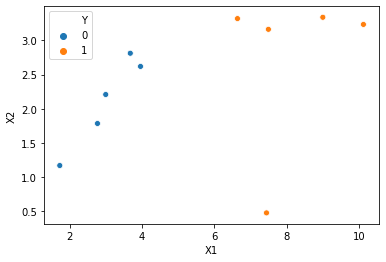

In [ ]:
import seaborn as sns
%matplotlib inline
sns.scatterplot(data=pd_df, x="X1", y="X2", hue = "Y")

Podemos trazar este conjunto de datos usando colores separados para cada clase. Puede ver que no sería difícil elegir manualmente un valor de X1 (eje x en el gráfico) para dividir este conjunto de datos.

In [ ]:
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
  """
  Función para hacer un split con base en un valor

  Input: index: El número de valor en la lista que se spliteara
         value: El valor para hacer el split
         dataset: Los datos 
  
  Regresa: Dos listas con los valores a la izquierda o derecha del split
  """
  left, right = list(), list()
  for row in dataset:
    if row[index] < value:
      left.append(row)
    else:
      right.append(row)
  return left, right

# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
  """
  Calcular el índice de Gini 
   Input: groups: una lista con los grupos de interés
         classes: Una lista con los labels

  Return: Float con el índice
  """
  # count all samples at split point
  n_instances = float(sum([len(group) for group in groups]))
  # sum weighted Gini index for each group
  gini = 0.0
  for group in groups:
    size = float(len(group))
    # avoid divide by zero
    if size == 0:
      continue
    score = 0.0
    # score the group based on the score for each class
    for class_val in classes:
      p = [row[-1] for row in group].count(class_val) / size
      score += p * p
    # weight the group score by its relative size
    gini += (1.0 - score) * (size / n_instances)
  return gini
 
# Select the best split point for a dataset
def get_split(dataset):
  """
  Función para seleccionar el mejor split para un conjunto de datos

  Input: dataset: Los datos en formato de lista
  
  Regresa: diccionario con el mejor split
  """
  class_values = list(set(row[-1] for row in dataset))
  b_index, b_value, b_score, b_groups = 999, 999, 999, None
  for index in range(len(dataset[0])-1):
    for row in dataset:
      groups = test_split(index, row[index], dataset)
      gini = gini_index(groups, class_values)
      #print('X%d < %.3f Gini=%.3f' % ((index+1), row[index], gini))
      if gini < b_score:
        b_index, b_value, b_score, b_groups = index, row[index], gini, groups

  #print("WINNER", 'X%d < %.3f' % (b_index + 1, b_value))
  return {'index':b_index, 'value':b_value, 'groups':b_groups}



In [ ]:
split = get_split(dataset)

La función get_split () se modificó para imprimir cada punto de división y su índice de Gini tal como se evaluó.

La ejecución del ejemplo imprime todas las puntuaciones de Gini y luego imprime la puntuación de la mejor división en el conjunto de datos de X1 <6.642 con un índice de Gini de 0.0 o una división perfecta.

### Paso 3. Construye un árbol
Crear el nodo raíz del árbol es fácil.

Llamamos a la función get_split () anterior utilizando el conjunto de datos completo.

Agregar más nodos a nuestro árbol es más interesante.

La construcción de un árbol se puede dividir en 3 partes principales:

- Nodos terminales.
- División recursiva.
- Construyendo un árbol.



#### 3.1. Nodos terminales
Necesitamos decidir cuándo dejar de cultivar un árbol.

Podemos hacer eso usando la profundidad y el número de filas de las que es responsable el nodo en el conjunto de datos de entrenamiento.

Profundidad máxima del árbol . Este es el número máximo de nodos del nodo raíz del árbol. Una vez que se alcanza la profundidad máxima del árbol, debemos dejar de dividir agregando nuevos nodos. Los árboles más profundos son más complejos y es más probable que se ajusten demasiado a los datos de entrenamiento.
Registros mínimos de nodo . Este es el número mínimo de patrones de entrenamiento de los que es responsable un nodo determinado. Una vez en o por debajo de este mínimo, debemos dejar de dividir y agregar nuevos nodos. Se espera que los nodos que representan muy pocos patrones de entrenamiento sean demasiado específicos y es probable que se ajusten demasiado a los datos de entrenamiento.
Estos dos enfoques serán argumentos especificados por el usuario para nuestro procedimiento de construcción de árboles.

Hay una condición más. Es posible elegir una división en la que todas las filas pertenezcan a un grupo. En este caso, no podremos continuar dividiendo y agregando nodos secundarios, ya que no tendremos registros para dividir en un lado u otro.

Ahora tenemos algunas ideas sobre cuándo dejar de hacer crecer el árbol. Cuando dejamos de crecer en un punto dado, ese nodo se llama nodo terminal y se usa para hacer una predicción final.

Esto se hace tomando el grupo de filas asignadas a ese nodo y seleccionando el valor de clase más común en el grupo. Esto se utilizará para hacer predicciones.

A continuación se muestra una función llamada to_terminal () que seleccionará un valor de clase para un grupo de filas. Devuelve el valor de salida más común en una lista de filas.

In [ ]:
# Create a terminal node value
def to_terminal(group):
  """
  Crear un valor terminal de un árbol
  Regresa: El valor más común
  """
  outcomes = [row[-1] for row in group]
  return max(set(outcomes), key=outcomes.count)

In [ ]:
grupo_1 = [[27, "SFO"], [28, "SFO"], [25, "NY"]]

In [ ]:
to_terminal(grupo_1)

'SFO'

#### 3.2. División recursiva
Sabemos cómo y cuándo crear nodos terminales, ahora podemos construir nuestro árbol.

La construcción de un árbol de decisión implica llamar a la función get_split () desarrollada anteriormente una y otra vez en los grupos creados para cada nodo.

Los nuevos nodos agregados a un nodo existente se denominan nodos secundarios. Un nodo puede tener cero hijos (un nodo terminal), un hijo (un lado hace una predicción directamente) o dos nodos hijos. Nos referiremos a los nodos secundarios como izquierdo y derecho en la representación del diccionario de un nodo dado.

Una vez que se crea un nodo, podemos crear nodos secundarios de forma recursiva en cada grupo de datos de la división llamando a la misma función nuevamente.

A continuación se muestra una función que implementa este procedimiento recursivo. Toma un nodo como argumento, así como la profundidad máxima, el número mínimo de patrones en un nodo y la profundidad actual de un nodo.

Puede imaginar cómo se podría llamar a esto primero pasar en el nodo raíz y la profundidad de 1. Esta función se explica mejor en pasos:

En primer lugar, los dos grupos de datos divididos por el nodo se extraen para su uso y se eliminan del nodo. Mientras trabajamos en estos grupos, el nodo ya no requiere acceso a estos datos.
A continuación, verificamos si el grupo de filas izquierdo o derecho está vacío y, de ser así, creamos un nodo terminal usando los registros que tenemos.
Luego verificamos si hemos alcanzado nuestra profundidad máxima y si es así creamos un nodo terminal.
Luego procesamos el hijo izquierdo, creando un nodo terminal si el grupo de filas es demasiado pequeño, de lo contrario creando y agregando el nodo izquierdo en profundidad primero hasta que se alcance la parte inferior del árbol en esta rama.
El lado derecho luego se procesa de la misma manera, a medida que volvemos a subir por el árbol construido hasta la raíz.

In [ ]:
def split(node, max_depth, min_size, depth):
  """
  Crear un split de modo recursivo
  Node: Una lista con la información 
  Max_depth: La profunidad máxima del árbol
  Min_size: El número mínimo de muestras en un nodo
  depth: La profundidad actual

  """
  left, right = node['groups']
  del(node['groups'])
  # check for a no split
  if not left or not right:
    node['left'] = node['right'] = to_terminal(left + right)
    return
  # check for max depth
  if depth >= max_depth:
    node['left'], node['right'] = to_terminal(left), to_terminal(right)
    return
  # process left child
  if len(left) <= min_size:
    node['left'] = to_terminal(left)
  else:
    node['left'] = get_split(left)
    split(node['left'], max_depth, min_size, depth+1)
  # process right child
  if len(right) <= min_size:
    node['right'] = to_terminal(right)
  else:
    node['right'] = get_split(right)
    split(node['right'], max_depth, min_size, depth+1)

#### 3.3. Construyendo un árbol
Ahora podemos juntar todas las piezas.

Construir el árbol implica crear el nodo raíz y llamar a la función split () que luego se llama a sí misma de forma recursiva para construir todo el árbol.

A continuación se muestra la pequeña función build_tree () que implementa este procedimiento.

In [ ]:
# Build a decision tree
def build_tree(train, max_depth, min_size):
  """
  Construir un árbol 
  train: La base de datos
  Max_depth: La profunidad máxima del árbol
  Min_size: El número mínimo de muestras en un árbol
  depth: La profundidad actual

  """
  root = get_split(train)
  print(root)
  split(root, max_depth, min_size, 1)
  return root

In [ ]:
# Print a decision tree
def print_tree(node, depth=0):
 if isinstance(node, dict):
  print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
  print_tree(node['left'], depth+1)
  print_tree(node['right'], depth+1)
 else:
  print('%s[%s]' % ((depth*' ', node)))

### Probamos todo

In [ ]:
tree = build_tree(dataset, 3, 1)
print_tree(tree)

{'index': 0, 'value': 6.642287351, 'groups': ([[2.771244718, 1.784783929, 0], [1.728571309, 1.169761413, 0], [3.678319846, 2.81281357, 0], [3.961043357, 2.61995032, 0], [2.999208922, 2.209014212, 0]], [[7.497545867, 3.162953546, 1], [9.00220326, 3.339047188, 1], [7.444542326, 0.476683375, 1], [10.12493903, 3.234550982, 1], [6.642287351, 3.319983761, 1]])}
[X1 < 6.642]
 [X1 < 2.771]
  [0]
  [X1 < 2.771]
   [0]
   [0]
 [X1 < 7.498]
  [X1 < 7.445]
   [1]
   [1]
  [X1 < 7.498]
   [1]
   [1]


### Caso aplicado

In [ ]:
train = pd.read_csv("files/train.csv")
test = pd.read_csv("files/test.csv")
import re

In [ ]:
# Copy original dataset in case we need it later when digging into interesting features
# WARNING: Beware of actually copying the dataframe instead of just referencing it
# "original_train = train" will create a reference to the train variable (changes in 'train' will apply to 'original_train')
original_train = train.copy() # Using 'copy()' allows to clone the dataset, creating a different object with the same values

# Feature engineering steps taken from Sina and Anisotropic, with minor changes to avoid warnings
full_data = [train, test]

# Feature that tells whether a passenger had a cabin on the Titanic
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

# Create new feature FamilySize as a combination of SibSp and Parch
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
# Create new feature IsAlone from FamilySize
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
# Remove all NULLS in the Embarked column
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
# Remove all NULLS in the Fare column
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

# Remove all NULLS in the Age column
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    # Next line has been improved to avoid warning
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Master": 2, "Mrs": 3, "Miss": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] ;

In [ ]:
# Feature selection: remove variables no longer containing relevant information
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)

In [ ]:
# Define function to calculate Gini Impurity
def get_gini_impurity(survived_count, total_count):
    survival_prob = survived_count/total_count
    not_survival_prob = (1 - survival_prob)
    random_observation_survived_prob = survival_prob
    random_observation_not_survived_prob = (1 - random_observation_survived_prob)
    mislabelling_survided_prob = not_survival_prob * random_observation_survived_prob
    mislabelling_not_survided_prob = survival_prob * random_observation_not_survived_prob
    gini_impurity = mislabelling_survided_prob + mislabelling_not_survided_prob
    return gini_impurity

In [ ]:
pd.crosstab(train.Survived, train.Sex)

Sex,0,1
Survived,,
0,81,468
1,233,109


In [ ]:
gini_impurity_starting_node = get_gini_impurity(81, 891)
gini_impurity_starting_node

0.1652892561983471

In [ ]:
gini_impurity_men = get_gini_impurity(109, 577)
gini_impurity_men

0.3064437162277843

In [ ]:
gini_impurity_women = get_gini_impurity(233, 314)
gini_impurity_women

0.3828350034484158

#### Visualicemos

In [ ]:
! pip install dtreeviz
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree

import graphviz
import pandas as pd
from dtreeviz.models.shadow_decision_tree import ShadowDecTree
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree
from dtreeviz import trees
from sklearn import tree

     |████████████████████████████████| 61 kB 240 kB/s eta 0:00:01
     |████████████████████████████████| 46 kB 1.3 MB/s eta 0:00:01
  Created wheel for dtreeviz: filename=dtreeviz-1.3.4-py3-none-any.whl size=67280 sha256=4a5d835ea7ec404bc1ed136f93f772c0236b2f410c325a38238b276e965e5ca1
  Stored in directory: /Users/carlos.grandet/Library/Caches/pip/wheels/4d/86/3c/7ce2123cbe1ebb81f2aa6e0bdba3d585b535242dc24ae750d6
Successfully built dtreeviz


In [ ]:
train

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,1,0,0,0,0,2,0,1
1,1,1,0,2,0,3,1,1,2,0,3
2,1,3,0,1,0,1,0,0,1,1,4
3,1,1,0,2,0,3,0,1,2,0,3
4,0,3,1,2,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,1,0,1,0,0,1,1,5
887,1,1,0,1,0,2,0,1,1,1,4
888,0,3,0,1,2,2,0,0,4,0,4
889,1,1,1,1,0,2,1,1,1,1,1


In [ ]:
Y_train = train.Survived
X_train = train.drop(["Survived"], axis = 1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Step 2: Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 5, class_weight = "balanced",
                             random_state = 0)
# Step 3: Train the model on the data
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=0)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


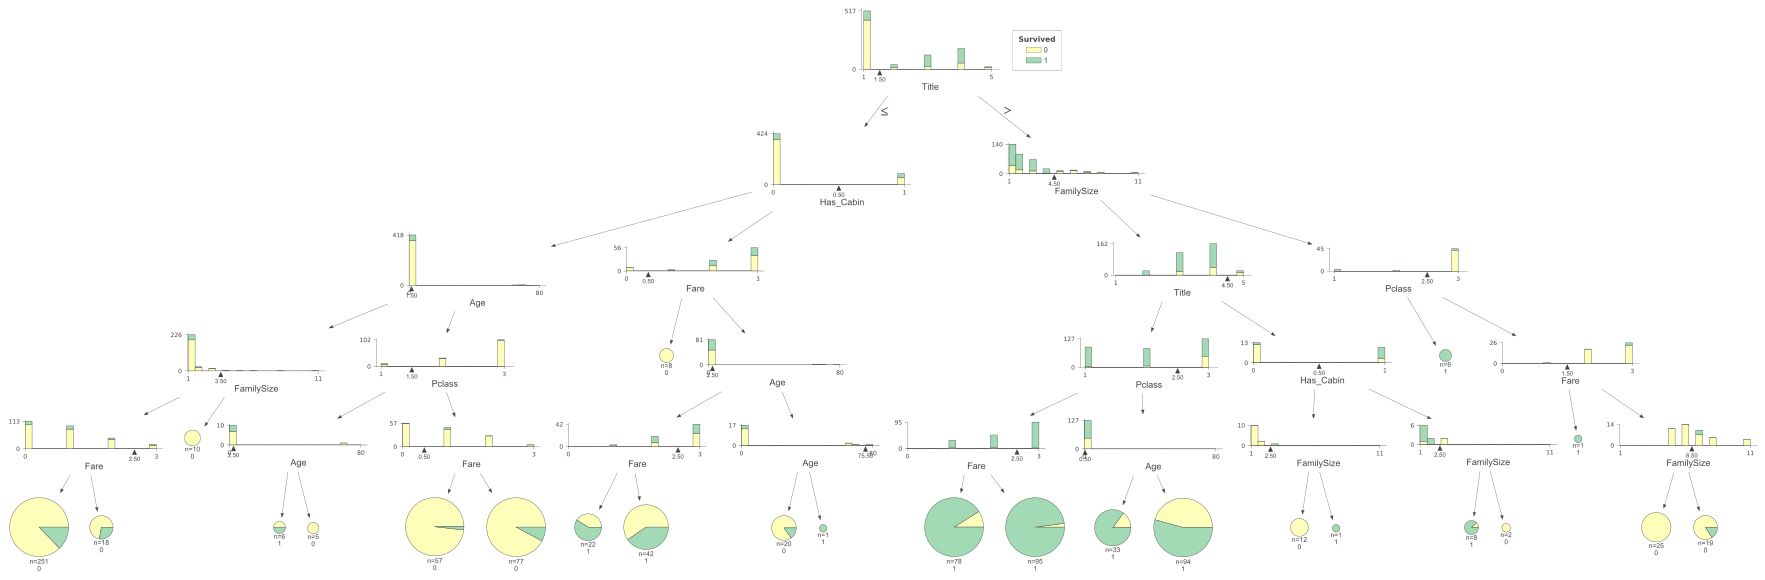

In [ ]:

trees.dtreeviz(clf, X_train, Y_train, X_train.columns, "Survived", class_names=[0, 1])

In [ ]:
leaves_index = clf.apply(X_train) 
train["leaf"] = leaves_index
leafs_results = (train.groupby(["leaf", "Survived"])["Pclass"].agg(["count"]).reset_index()
.pivot_table(index = "leaf", columns = "Survived"))
leafs_results.columns = ["NO", "SI"]
leafs_results.fillna(0, inplace=True)
leafs_results["PERC"] = leafs_results["SI"] / (leafs_results.SI + leafs_results.NO)
leafs_results["TOTAL"] =  (leafs_results.SI + leafs_results.NO)
leafs_results.sort_values(by = "PERC")

,NO,SI,PERC,TOTAL
leaf,,,,
39,2.0,0.0,0.000000,2.0
7,10.0,0.0,0.000000,10.0
35,12.0,0.0,0.000000,12.0
11,5.0,0.0,0.000000,5.0
16,8.0,0.0,0.000000,8.0
45,25.0,0.0,0.000000,25.0
13,56.0,1.0,0.017544,57.0
14,71.0,6.0,0.077922,77.0
5,219.0,32.0,0.127490,251.0
